In [27]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import sklearn as sk
import scipy as sp
import seaborn as sns

In [7]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## Rejection Sampling

C:\Users\82107\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


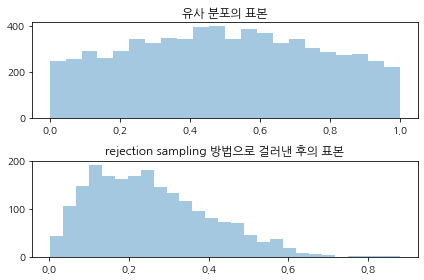

In [28]:
a = 2
b = 6
rv_p = sp.stats.beta(a, b)
rv_q = sp.stats.norm(loc=0.5, scale=0.5)
k = 5

np.random.seed(0)
x_q0 = rv_q.rvs(int(1e4))
x_q = x_q0[(x_q0 >= 0) & (x_q0 <= 1)]
crits = rv_p.pdf(x_q) / (rv_q.pdf(x_q) * k)
coins = np.random.rand(len(x_q))
x_p = x_q[coins < crits]

plt.subplot(211)
sns.distplot(x_q, kde=False)
plt.title("유사 분포의 표본")
plt.subplot(212)
sns.distplot(x_p, kde=False)
plt.title("rejection sampling 방법으로 걸러낸 후의 표본")
plt.tight_layout()
plt.show()

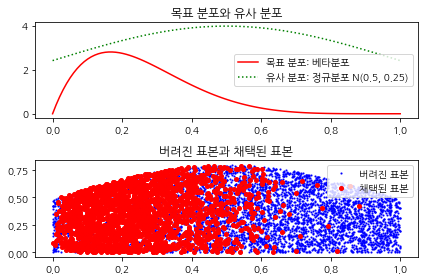

In [29]:
plt.subplot(211)
xx = np.linspace(0, 1, 100)
plt.plot(xx, rv_p.pdf(xx), 'r-', label="목표 분포: 베타분포")
plt.plot(xx, rv_q.pdf(xx) * k, 'g:', label="유사 분포: 정규분포 N(0.5, 0.25)")
plt.legend()
plt.title("목표 분포와 유사 분포")
plt.subplot(212)
y = np.random.rand(len(x_q)) * rv_q.pdf(x_q)
plt.plot(x_q, y, 'bs', ms=1, label="버려진 표본")
ids = coins < crits
plt.plot(x_q[ids], y[ids], 'ro', ms=4, label="채택된 표본")
plt.legend()
plt.title("버려진 표본과 채택된 표본")
plt.tight_layout()
plt.show()

In [31]:
# 기댓값 추정
x_p.mean()

0.25452461685193456

## Importance Sampling
 - 기댓값만을 계산하려면-> Importance Sampling 사용

In [33]:
# 버린 표본이 80%나 됨

len(x_p), len(x_q0)

(2038, 10000)

In [35]:
# 바로 기댓값 계산
np.mean(x_q0 * rv_p.pdf(x_q0) / rv_q.pdf(x_q0))

0.25391867593605905